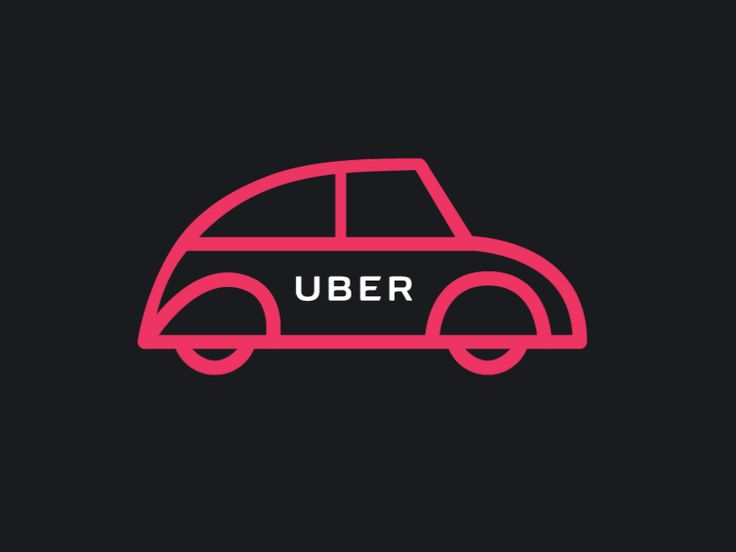

# Description of Uber and Notebook Work

**Uber**: Uber is a multinational transportation network company that operates through a mobile app, connecting passengers with drivers for on-demand rides. With a vast network of drivers and a user-friendly interface, Uber offers a convenient and reliable transportation service worldwide.

 we have analyzed a dataset containing information about Uber rides. The dataset includes details such as start and end dates, category, start and stop locations, miles traveled, and purpose of the ride. We have performed various tasks such as data cleaning, exploratory data analysis, and modeling using machine learning algorithms. Through visualizations and statistical analysis, we have gained insights into the patterns and trends present in the data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style  #is used to add colored output to terminal text, making it visually more appealing and easier to distinguish different types of messages or information. The Fore module provides foreground color constants that you can use to change the color of the text, and the Style module provides constants for applying text styles such as bold, italic, and underline.

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("UberDataset.csv")

In [3]:
df.head(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [4]:
print(f"{Fore.GREEN}The Shape of Dataset is: {df.shape}.{Style.RESET_ALL}")

The Shape of Dataset is: (1156, 7).


In [5]:
print(f"{Fore.BLUE}Information of Features in Dataset: \n.{Style.RESET_ALL}")
df.info()

Information of Features in Dataset: 
.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
print(f"{Fore.RED}Statistical Analysis of Feature 'MILES: \n.{Style.RESET_ALL}")
df.describe()

Statistical Analysis of Feature 'MILES: 
.


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
print(f"{Fore.YELLOW}Duplicat Row in Dataset: \n.{Style.RESET_ALL}")

df[df.duplicated()]

Duplicat Row in Dataset: 
.


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
print(f"{Fore.MAGENTA}Null Values in Each Feature: \n.{Style.RESET_ALL}")
df.isnull().sum()

Null Values in Each Feature: 
.


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Feature Engineering

In [12]:
# Converting dtype as datetime 
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [13]:
# Renameing of features
df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)


In [14]:
# Creating new features for better analysis and accuracy

# df["year"] = df['start_date'].dt.year
df['day_name'] = df['start_date'].dt.day_name()

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

df["month"] = df['start_date'].dt.month_name()

df['duration'] = (df['end_date'] - df['start_date']).astype('timedelta64[m]')


In [15]:
print(f"{Fore.LIGHTRED_EX}New Data: \n.{Style.RESET_ALL}")
data = df.copy()
df.head(5)

New Data: 
.


,start_date,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0


# Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

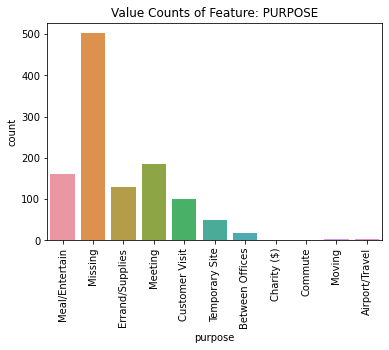

In [16]:
sns.countplot(x=df["purpose"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

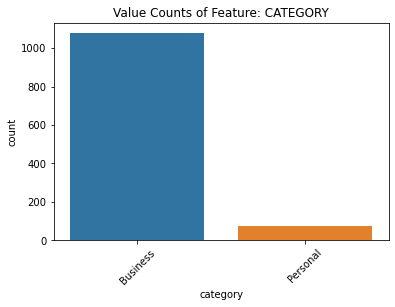

In [17]:
sns.countplot(x=df["category"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

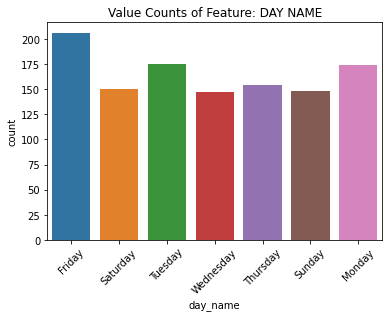

In [18]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

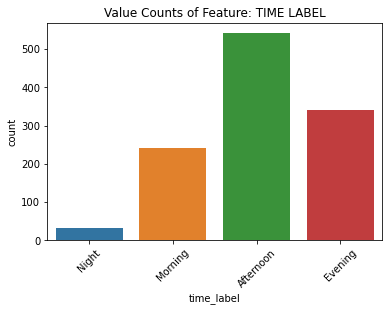

In [19]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts of Feature: TIME LABEL")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

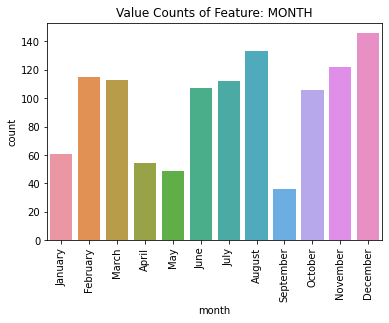

In [20]:
sns.countplot(x=df["month"])
plt.title("Value Counts of Feature: MONTH")
plt.xticks(rotation=90)

# Barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

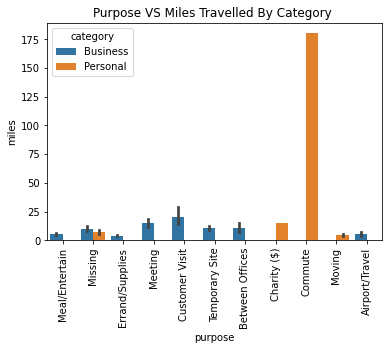

In [21]:
sns.barplot(x= df["purpose"], y= df['miles'],hue = df["category"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

# Boxplot

Text(0.5, 1.0, 'Outliers in MILES over TIME')

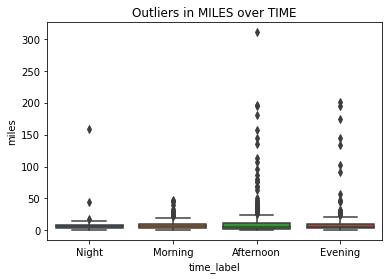

In [22]:
sns.boxplot(x=df["time_label"],y=df["miles"])
plt.title("Outliers in MILES over TIME")

Text(0.5, 1.0, 'Outliers in Duration')

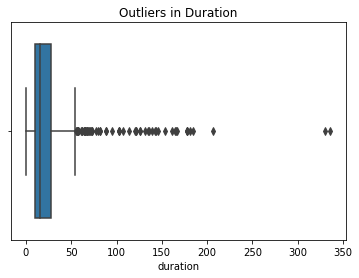

In [23]:
sns.boxplot(x=df["duration"],data=df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

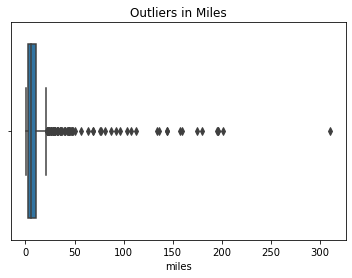

In [24]:
sns.boxplot(x=df['miles'],data = df)
plt.title("Outliers in Miles")

# Distplot

Text(0.5, 1.0, 'Density PLot for Miles')

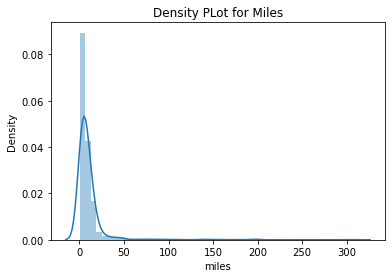

In [25]:
sns.distplot(df["miles"])
plt.title("Density PLot for Miles")

Text(0.5, 1.0, 'Density PLot for Duration')

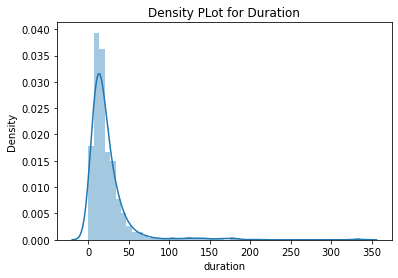

In [26]:
sns.distplot(df["duration"])
plt.title("Density PLot for Duration")

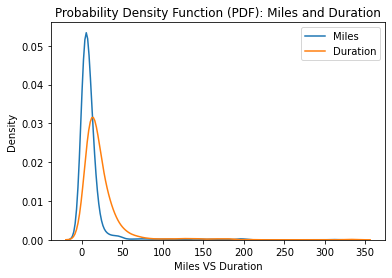

In [27]:
sns.distplot(df["miles"],hist = False,label="Miles")
sns.distplot(df["duration"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()


# LinePlot

Outliers in data: 
.


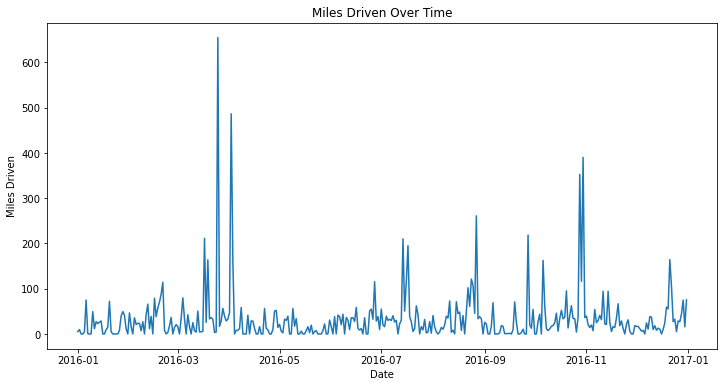

In [28]:
print(f"{Fore.CYAN}Outliers in data: \n.{Style.RESET_ALL}")
df = df[df['start_date'] != "Totals"]
df['start_date'] = pd.to_datetime(df['start_date'])
df.set_index('start_date', inplace=True)
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

In [29]:

# Calculate IQR for 'miles' feature
Q1_miles = np.percentile(df['miles'], 25)
Q3_miles = np.percentile(df['miles'], 75)
IQR_miles = Q3_miles - Q1_miles

# Calculate IQR for 'duration' feature
Q1_duration = np.percentile(df['duration'], 25)
Q3_duration = np.percentile(df['duration'], 75)
IQR_duration = Q3_duration - Q1_duration

# Define outlier boundaries
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Identify and deal with outliers
df['miles'] = np.where(df['miles'] < lower_bound_miles, lower_bound_miles, df['miles'])
df['miles'] = np.where(df['miles'] > upper_bound_miles, upper_bound_miles, df['miles'])

df['duration'] = np.where(df['duration'] < lower_bound_duration, lower_bound_duration, df['duration'])
df['duration'] = np.where(df['duration'] > upper_bound_duration, upper_bound_duration, df['duration'])


After Outliers Treatment: 
.


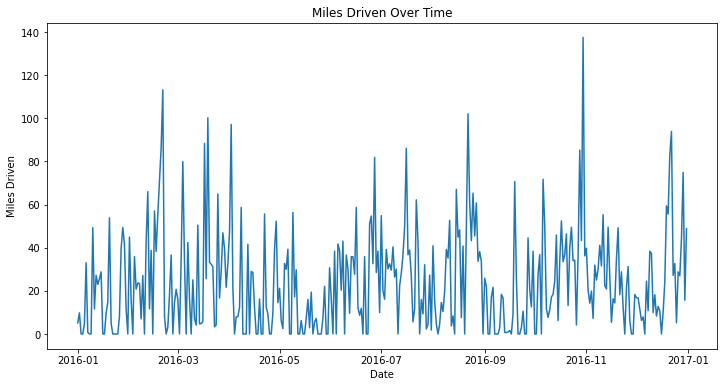

In [30]:
print(f"{Fore.RED}After Outliers Treatment: \n.{Style.RESET_ALL}")
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

# Encoding

In [31]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0


# checkiing normality

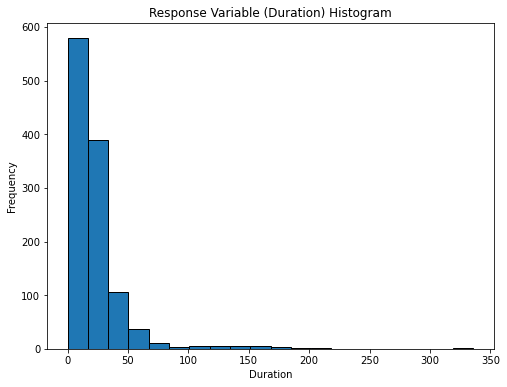

<Figure size 576x432 with 0 Axes>

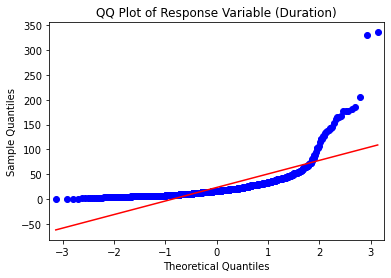

Shapiro-Wilk Test for Response Variable:
Test Statistic: 0.5541347861289978
p-value: 0.0
The response variable is not normally distributed (reject H0)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Assuming 'data' is your DataFrame and "duration" is the response variable
response_variable = data["duration"]

# Plot a histogram of the response variable
plt.figure(figsize=(8, 6))
plt.hist(response_variable, bins=20, edgecolor='k')
plt.title('Response Variable (Duration) Histogram')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Create a QQ plot for the response variable
plt.figure(figsize=(8, 6))
sm.qqplot(response_variable, line='s')  # 's' for standardized line
plt.title('QQ Plot of Response Variable (Duration)')
plt.show()

# Perform a Shapiro-Wilk normality test for the response variable
shapiro_test_statistic, shapiro_p_value = stats.shapiro(response_variable)
print("Shapiro-Wilk Test for Response Variable:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("The response variable is not normally distributed (reject H0)")
else:
    print("The response variable is normally distributed (fail to reject H0)")


In [1]:
data["start"].unique()

NameError: name 'data' is not defined

In [ ]:
# creating 

In [ ]:
# Using pandas to encode featuers 
#df_encoded = pd.get_dummies(data, columns=['category', 'start',"purpose", 'stop', 'day_name', 'time_label', 'month'])

In [35]:
# df_encoded.head()

,start_date,end_date,miles,duration,category_Business,category_Personal,start_Agnew,start_Almond,start_Apex,start_Arabi,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,2016-01-01 21:11:00,2016-01-01 21:17:00,5.1,6.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,5.0,12.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,4.8,13.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,4.7,14.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,63.7,67.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['miles',"start_date","end_date"], axis=1) 
y = df_encoded['miles']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Check if any variable is None
if X_train is None:
    print("X_train is None")

if y_train is None:
    print("y_train is None")

if X_test is None:
    print("X_test is None")
    
if y_test is None:
    print("y_test is None")

# Example of handling None values
if X_train is None or y_train is None or X_test is None or y_test is None:
    print("Some data is missing, cannot proceed.")
else:
    # Perform operations using the data
    print("Performing operations...")

Performing operations...


# Models Training

In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


CatBoost is a machine learning library and algorithm developed by Yandex, a Russian multinational IT company. CatBoost stands for "Categorical Boosting," and it's specifically designed for gradient boosting on categorical features. Gradient boosting is a powerful ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weak models, usually decision trees.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

Let's explore different machine learning algorithms to find the best model for our task. Here are the models we will be considering:

- Linear Regression
- Decision Tree
- Random Forest
- Support Vector Regression (SVR)
- XGBoost
- LightGBM 
- Gradient Boosting Regressor
- ADA Boost
- Linear SVR
- KNN Regressor
- Cat Boost Regressor


In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
    'KNN Regressor' : KNeighborsRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor()
}

In [41]:
accuracy = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 923, number of used features: 50
[LightGBM] [Info] Start training from score 10.210943


AttributeError: 'NoneType' object has no attribute 'split'

# Model Evaluation and Graphs


In [ ]:
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy[name] = r2
    
    print(f"Results for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

# Model Accuracy Scores


In [ ]:
accuracy_df = pd.DataFrame({'Model': list(accuracy.keys()), 'Accuracy Score': list(accuracy.values())})
accuracy_df

thank you...!